In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

M=3

amp_list = [0.05,0.1,0.15,0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

In [2]:
heatmap_nospin = np.load('Models/Metrics.npz')
heatmap_spin = np.load('Models/Metrics_spin.npz')
    
js_nospin = heatmap_nospin['js']
js_spin = heatmap_spin['js']

df_nospin = pd.DataFrame(js_nospin, columns=amp_list, index=amp_list)
df_spin = pd.DataFrame(js_spin, columns=amp_list, index=amp_list)

[]

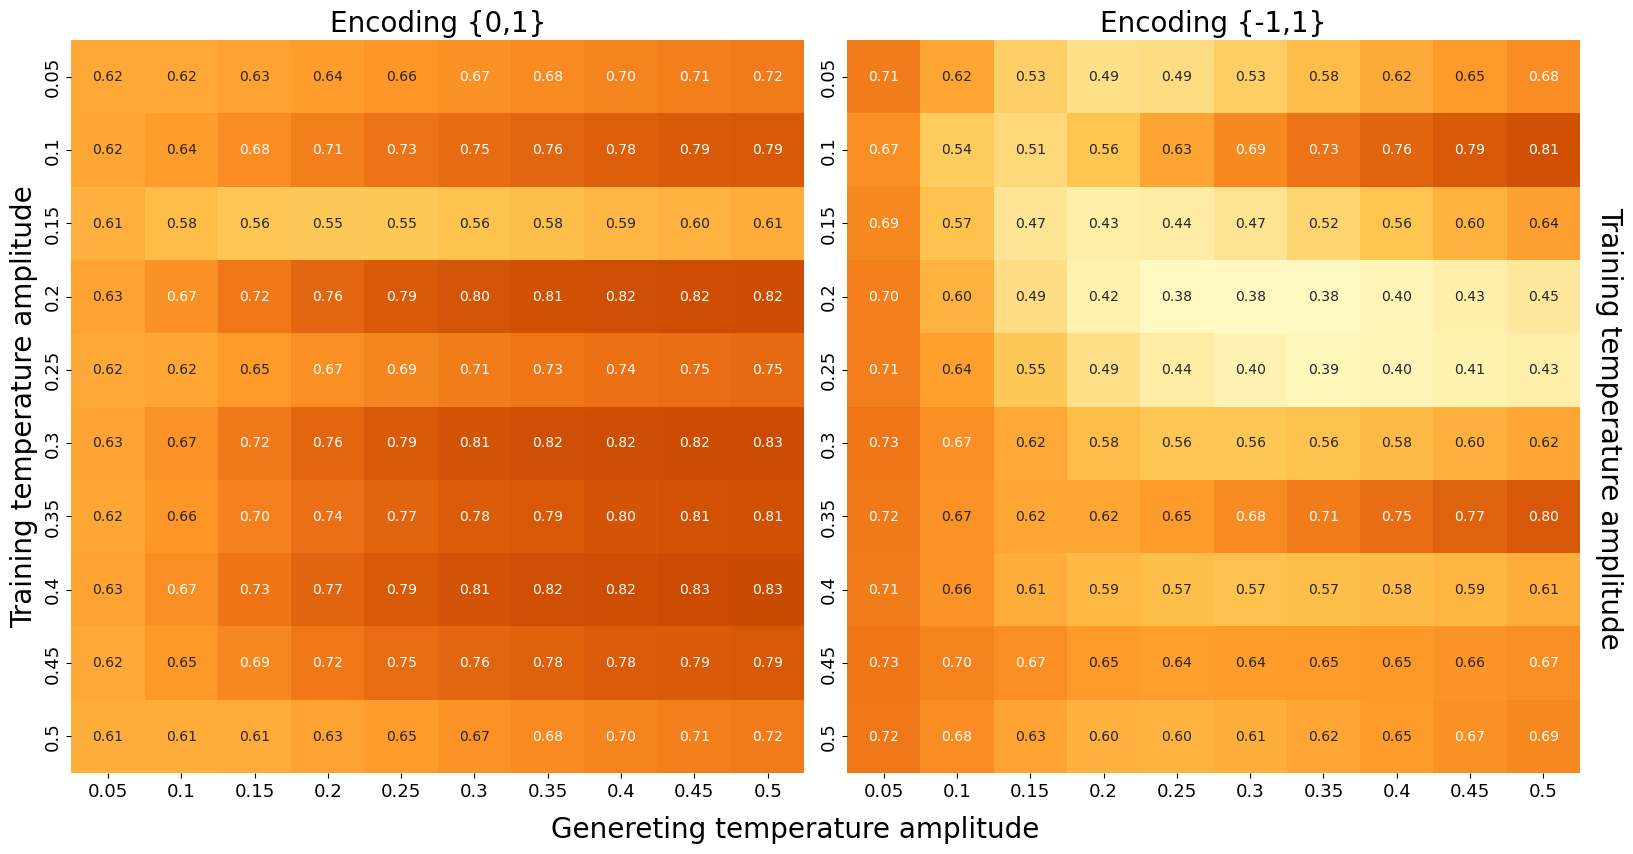

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,16), sharex=True)
h1=sns.heatmap(ax=ax[0],
               data=df_nospin,
               annot=True,
               fmt=".2f",
               cbar=False,
               square=True,
               center=0.65,
               vmin=0.3,
               vmax=1,
               cmap=sns.color_palette("YlOrBr", as_cmap=True))

h2=sns.heatmap(ax=ax[1],
               data=df_spin,
               annot=True,
               fmt=".2f",
               cbar=False,
               square=True,
               center=0.65,
               vmin=0.3,
               vmax=1,
               cmap=sns.color_palette("YlOrBr", as_cmap=True))


fig.text(1, 0.5,'Training temperature amplitude', fontsize=20, va='center', rotation=-90)

ax[0].set_title('Encoding {0,1}', fontsize=20)
ax[0].set_ylabel(r'Training temperature amplitude', fontsize=20)
#ax[0].set_xlabel('Genereting temperature amplitude', fontsize=20)


ax[1].set_title('Encoding {-1,1}', fontsize=20)
#ax[1].set_ylabel('Training temperature amplitude', fontsize=20, va='center', rotation=-90)
#ax[1].set_xlabel('Genereting temperature amplitude', fontsize=20)
#ax[1].yaxis.set_label_position("right")
#ax[1].yaxis.tick_right()
ax[0].tick_params(axis='both', which='major', labelsize=13)
ax[1].tick_params(axis='both', which='major', labelsize=13)

fig.supxlabel('Genereting temperature amplitude', fontsize=20,y=0.24)
fig.tight_layout()
plt.savefig('JSheatmaps.pdf')
plt.plot()

## We select the model that better represent the distribution of our data
Notice how the best js divergence is found using the spin model

In [4]:
model_nospin = np.load('Models/RMSprop_015_1.npz')
model_spin = np.load('Models/RMSprop_02_1_spin.npz')

w015_nospin = model_nospin['w']
w02_spin = model_spin['w']

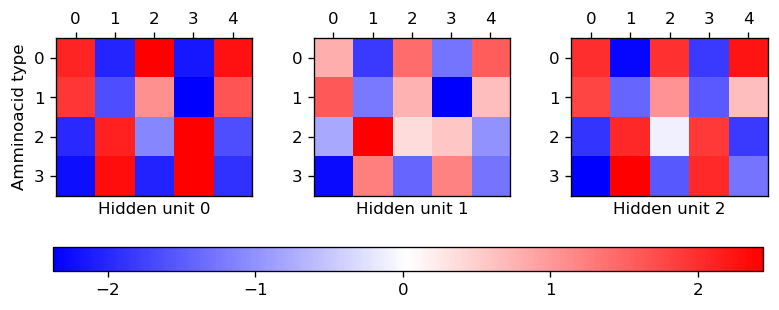

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=M, figsize=(8,4), dpi=120)
fig.tight_layout()

ww = w015_nospin.reshape((5,4,M))
for h in range(M):
    c=ax[h].matshow(ww[:,:,h].T, cmap='bwr')
    ax[h].set_xlabel('Hidden unit '+str(h))
    if h==0 :ax[h].set_ylabel('Amminoacid type')
    ax[h].tick_params(top=True, bottom=False,
           labeltop=True, labelbottom=False)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.055, 0.2, 0.74, 0.05])
fig.colorbar(c, cax=cbar_ax, orientation='horizontal')
plt.savefig('w_nospin.pdf')
plt.show()

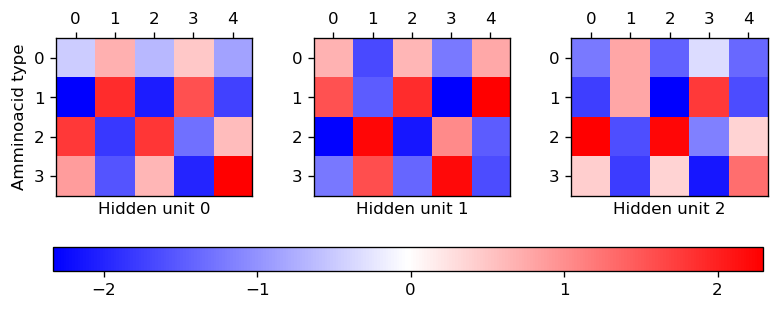

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=M, figsize=(8,4), dpi=120)
fig.tight_layout()

ww = w02_spin.reshape((5,4,M))
for h in range(M):
    c=ax[h].matshow(ww[:,:,h].T, cmap='bwr')
    ax[h].set_xticks(np.arange(5), labels=np.arange(5))
    ax[h].set_xlabel('Hidden unit '+str(h))
    if h==0 :ax[h].set_ylabel('Amminoacid type')
    ax[h].tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.055, 0.2, 0.74, 0.05])
fig.colorbar(c, cax=cbar_ax, orientation='horizontal')
plt.savefig('w_spin.pdf')
plt.show()

# Comparison 3 and 6 hidden units

In [7]:
model_spin_3hidden = np.load('Models/RMSprop_02_1_spin.npz')
model_spin_6hidden = np.load('Models/RMSprop_02_1_spin_6hiddenunits.npz')

w02_spin_3hidden = model_spin_3hidden['w']
w02_spin_6hidden = model_spin_6hidden['w']

In [8]:
# fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(8,4), dpi=120)
# fig.tight_layout()

# hidden_3 = w02_spin_3hidden.reshape((5,4,3))

# for h in range(3):
#     c=ax[0,h].matshow(hidden_3[:,:,h].T, cmap='bwr')
#     ax[0,h].set_xticks(np.arange(5), labels=np.arange(5))
#     ax[0,h].set_xlabel('Hidden unit '+str(h))
#     if h==0 :ax[0,h].set_ylabel('Amminoacid type')
#     ax[0,h].tick_params(top=True, bottom=False,
#                labeltop=True, labelbottom=False)

# hidden_6 = w02_spin_6hidden.reshape((5,4,6))
# j=2
# for h in range(3):
#     c=ax[j,h].matshow(hidden_6[:,:,h].T, cmap='bwr')
#     ax[j,h].set_xticks(np.arange(5), labels=np.arange(5))
#     ax[j,h].set_xlabel('Hidden unit '+str(h))
#     if h==0 :ax[j,h].set_ylabel('Amminoacid type')
#     ax[j,h].tick_params(top=True, bottom=False,
#                labeltop=True, labelbottom=False)
# j=3
# for h in [3,4,5]:
#     c=ax[j,h].matshow(hidden_6[:,:,h].T, cmap='bwr')
#     ax[j,h].set_xticks(np.arange(5), labels=np.arange(5))
#     ax[j,h].set_xlabel('Hidden unit '+str(h))
#     if h==0 :ax[j,h].set_ylabel('Amminoacid type')
#     ax[j,h].tick_params(top=True, bottom=False,
#                labeltop=True, labelbottom=False)
        

# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.055, 0.2, 0.74, 0.05])
# fig.colorbar(c, cax=cbar_ax, orientation='horizontal')
# plt.savefig('w_spin.pdf')
# plt.show()